In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools

In [2]:
!echo '{"username":"shauryagoel","key":"99b18bf60d96475b98c3c32c0d3b33ec"}' > /root/.kaggle/kaggle.json

/bin/bash: /root/.kaggle/kaggle.json: No such file or directory


In [3]:
!kaggle datasets download himanshupoddar/zomato-bangalore-restaurants --unzip

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [0]:
!echo '{"username":"shauryagoel","key":"99b18bf60d96475b98c3c32c0d3b33ec"}' > /root/.kaggle/kaggle.json

In [5]:
!kaggle datasets download himanshupoddar/zomato-bangalore-restaurants --unzip

 91% 81.0M/89.0M [00:01<00:00, 48.4MB/s]
100% 89.0M/89.0M [00:01<00:00, 54.3MB/s]


In [0]:
df=pd.read_csv('/content/zomato.csv')

In [0]:
df.shape

(51717, 17)

In [0]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [0]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [0]:
df['url'].str.startswith('http').all()   # first column is all URLs

True

In [0]:
df['menu_item'].unique()
# value_counts().to_list()

array(['[]',
       "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Chees

In [0]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [0]:
del df['dish_liked']               # too many null values so remove the column
del df['listed_in(city)']          # 'location' column is more accurate
df.drop(['url','phone'],axis=1,inplace=True)   # don't care about these
del df['menu_item']                # many null values
df.dropna(axis=0,inplace=True)     # Drop null rows as they have other missing columns too 
df=df[(df['rate']!='NEW')&(df['rate']!='-')]            # There are rows in rate with 'NEW' value 

In [8]:
# Now no null values remain
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
listed_in(type)                0
dtype: int64

In [0]:
df.shape

(41263, 12)

In [9]:
# Now change the order of columns and their data types
df=df.loc[:,['name','address','location','listed_in(type)','cuisines','approx_cost(for two people)','online_order','book_table','rate','votes','reviews_list']]
df=df.rename(columns={'listed_in(type)':'rest_type','approx_cost(for two people)':'cost(per person)','rate':'rating'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41263 entries, 0 to 51716
Data columns (total 11 columns):
name                41263 non-null object
address             41263 non-null object
location            41263 non-null object
rest_type           41263 non-null object
cuisines            41263 non-null object
cost(per person)    41263 non-null object
online_order        41263 non-null object
book_table          41263 non-null object
rating              41263 non-null object
votes               41263 non-null int64
reviews_list        41263 non-null object
dtypes: int64(1), object(10)
memory usage: 3.8+ MB


In [0]:
df['rating']=df['rating'].apply(lambda x:x.replace('/5',''))     # Removes '/5' from rating
df['cost(per person)']=df['cost(per person)'].apply(lambda x:x.replace(',',''))    # removes thousand indicators(,)

df['book_table']=df['book_table'].astype('category').cat.codes
df['online_order']=df['online_order'].astype('category').cat.codes

df[['cost(per person)','votes','online_order','book_table']]=df[['cost(per person)','votes','online_order','book_table']].astype(np.int64)
df['cost(per person)']=df['cost(per person)'].apply(lambda x:np.int64(x/2))   # find cost per person
df['rating']=df['rating'].astype(np.float)


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41263 entries, 0 to 51716
Data columns (total 11 columns):
name                41263 non-null object
address             41263 non-null object
location            41263 non-null object
rest_type           41263 non-null object
cuisines            41263 non-null object
cost(per person)    41263 non-null int64
online_order        41263 non-null int64
book_table          41263 non-null int64
rating              41263 non-null float64
votes               41263 non-null int64
reviews_list        41263 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 3.8+ MB


In [0]:
df=df.reset_index()
del df['index']

In [0]:
# Add a revenue column
revenue=df['cost(per person)']*df['votes']
df.insert(10,'revenue',revenue)

In [0]:
df['reviews_list'][1]

'[(\'Rated 4.0\', \'RATED\\n  Had been here for dinner with family. Turned out to be a good choose suitable for all ages of people. Can try this place. We liked the most was their starters. Service is good. Prices are affordable. Will recommend this restaurant for early dinner. The place is little noisy.\'), (\'Rated 3.0\', \'RATED\\n  The ambience is really nice, staff is courteous. The price is pretty high for the quantity, but overall the experience was fine. The quality of food is nice but nothing extraordinary. They also have buffet(only veg)\'), (\'Rated 3.0\', \'RATED\\n  I felt good is little expensive for the quantity they serve and In terms of taste is decent. There is nothing much to talk about the ambience, regular casual dining restaurant where you can take your family for dinner or lunch. If they improve on that quantity or may be reduce the price a bit or may be improve the presentation of the food it might Manage to get more repeat customers.\'), (\'Rated 4.0\', \'RATED

In [0]:

# df['reviews_list'][1]
for i in df['reviews_list'][1].split('),'):
    pprint(i)

("[('Rated 4.0', 'RATED\\n  Had been here for dinner with family. Turned out "
 'to be a good choose suitable for all ages of people. Can try this place. We '
 'liked the most was their starters. Service is good. Prices are affordable. '
 "Will recommend this restaurant for early dinner. The place is little noisy.'")
(" ('Rated 3.0', 'RATED\\n  The ambience is really nice, staff is courteous. "
 'The price is pretty high for the quantity, but overall the experience was '
 'fine. The quality of food is nice but nothing extraordinary. They also have '
 "buffet(only veg)'")
(" ('Rated 3.0', 'RATED\\n  I felt good is little expensive for the quantity "
 'they serve and In terms of taste is decent. There is nothing much to talk '
 'about the ambience, regular casual dining restaurant where you can take your '
 'family for dinner or lunch. If they improve on that quantity or may be '
 'reduce the price a bit or may be improve the presentation of the food it '
 "might Manage to get more repea

In [0]:
# for i,val in enumerate(df['name'].to_list()[:]):
#     for j in val.split(' '):
#         if (not j.isalnum()):
#             if ('&' not in val) and ('-' not in val) and ('\'' not in val) and ('.' not in val):
#                 print(i,val)


In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# df.to_csv('/content/Dsc_data_v3.csv')
# !cp '/content/Dsc_data_v3.csv' '/content/drive/My Drive/Data/Dsc_data_v3.csv'

# EDA

In [0]:
df

,name,address,location,rest_type,cuisines,cost(per person),online_order,book_table,rating,votes,revenue,reviews_list
0,Jalsa,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Banashankari,Buffet,"North Indian, Mughlai, Chinese",400,1,1,4.1,775,310000,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Banashankari,Buffet,"Chinese, North Indian, Thai",400,1,0,4.1,787,314800,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,San Churro Cafe,"1112, Next to KIMS Medical College, 17th Cross...",Banashankari,Buffet,"Cafe, Mexican, Italian",400,1,0,3.8,918,367200,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,Addhuri Udupi Bhojana,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Banashankari,Buffet,"South Indian, North Indian",150,0,0,3.7,88,13200,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,Grand Village,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Basavanagudi,Buffet,"North Indian, Rajasthani",300,0,0,3.8,166,49800,"[('Rated 4.0', 'RATED\n Very good restaurant ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
41258,The Farm House Bar n Grill,"136, SAP Labs India, KIADB Export Promotion In...",Whitefield,Pubs and bars,"North Indian, Continental",400,0,0,3.7,34,13600,"[('Rated 4.0', 'RATED\n Ambience- Big and spa..."
41259,Bhagini,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Whitefield,Pubs and bars,"Andhra, South Indian, Chinese, North Indian",400,0,0,2.5,81,32400,"[('Rated 4.0', 'RATED\n A fine place to chill..."
41260,Best Brews - Four Points by Sheraton Bengaluru...,"Four Points by Sheraton Bengaluru, 43/3, White...",Whitefield,Pubs and bars,Continental,750,0,0,3.6,27,20250,"[('Rated 5.0', ""RATED\n Food and service are ..."
41261,Chime - Sheraton Grand Bengaluru Whitefield Ho...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,"ITPL Main Road, Whitefield",Pubs and bars,Finger Food,1250,0,1,4.3,236,295000,"[('Rated 4.0', 'RATED\n Nice and friendly pla..."


In [0]:
list(set(itertools.chain(*[i.split(', ') for i in df['cuisines'].unique()])))   # 105 in number

['Parsi',
 'Gujarati',
 'Seafood',
 'North Eastern',
 'Greek',
 'Afghani',
 'Hyderabadi',
 'Desserts',
 'Maharashtrian',
 'Healthy Food',
 'Biryani',
 'Chinese',
 'Bohri',
 'Indian',
 'Bihari',
 'Mangalorean',
 'Fast Food',
 'Italian',
 'Bakery',
 'French',
 'Singaporean',
 'Roast Chicken',
 'Kebab',
 'Naga',
 'Konkan',
 'Hot dogs',
 'Kashmiri',
 'Arabian',
 'Rolls',
 'Sandwich',
 'Tea',
 'Charcoal Chicken',
 'Middle Eastern',
 'Chettinad',
 'Momos',
 'Vegan',
 'Cafe',
 'Mediterranean',
 'Salad',
 'Jewish',
 'North Indian',
 'Raw Meats',
 'Bengali',
 'Mithai',
 'Mongolian',
 'Awadhi',
 'Malaysian',
 'Russian',
 'African',
 'Lebanese',
 'Korean',
 'Pizza',
 'Ice Cream',
 'Vietnamese',
 'German',
 'Indonesian',
 'Belgian',
 'Tex-Mex',
 'Beverages',
 'British',
 'Tibetan',
 'Iranian',
 'European',
 'Sri Lankan',
 'Turkish',
 'Mughlai',
 'Thai',
 'Afghan',
 'Rajasthani',
 'BBQ',
 'Australian',
 'Mexican',
 'Paan',
 'Street Food',
 'Drinks Only',
 'Wraps',
 'Asian',
 'Finger Food',
 'Oriya'

In [0]:
list(set(itertools.chain(*[i.split(', ') for i in df['rest_type'].unique()])))     # 7 in number

['Cafes',
 'Pubs and bars',
 'Dine-out',
 'Buffet',
 'Drinks & nightlife',
 'Desserts',
 'Delivery']

In [0]:
df['location'].unique()      # 92 in number

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

In [0]:
# list(filter(lambda x:len(x)<10,df['cuisines'].unique().tolist()))

# Plots

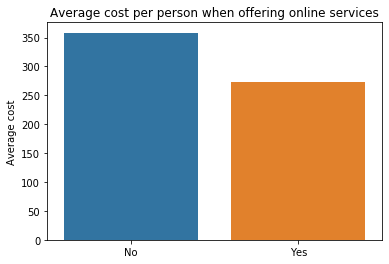

In [0]:
online_cost=df.groupby('online_order').mean()
sns.barplot(['No','Yes'],online_cost['cost(per person)'].to_list())
plt.ylabel('Average cost')
plt.title('Average cost per person when offering online services')
plt.show()

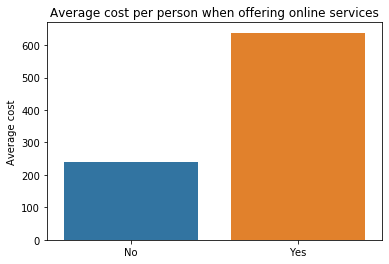

In [0]:
online_cost=df.groupby('book_table').mean()
sns.barplot(['No','Yes'],online_cost['cost(per person)'].to_list())
plt.ylabel('Average cost')
plt.title('Average cost per person when offering online services')
plt.show()

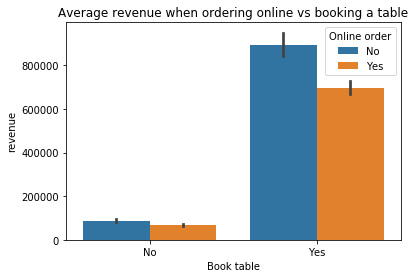

In [97]:
ax=sns.barplot(x="book_table", y="revenue", hue="online_order", data=df)
# ax=sns.barplot(x="online_order", y="cost(per person)", hue="book_table", data=df)

h, _ = ax.get_legend_handles_labels()
ax.legend(h, ['No','Yes'], title="Online order")
ax.set_xlabel('Book table')
ax.set_xticklabels(['No','Yes'])
plt.title('Average revenue when ordering online vs booking a table')
plt.show()

In [0]:
df.corr()

,cost(per person),online_order,book_table,rating,votes
cost(per person),1.000000,-0.175665,0.614294,0.385384,0.366556
online_order,-0.175665,1.000000,-0.054843,0.068970,-0.013357
book_table,0.614294,-0.054843,1.000000,0.426070,0.393186
rating,0.385384,0.068970,0.426070,1.000000,0.435256
votes,0.366556,-0.013357,0.393186,0.435256,1.000000


In [0]:
# df[['online_order','votes']].corr()
a=df.groupby(['book_table']).mean()

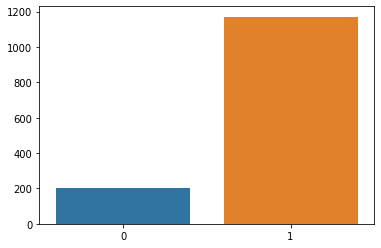

In [0]:
sns.barplot(a.index.to_list(),a['votes'].to_list())

In [0]:
# df.groupby(['book_table']).median()
location_wise_mean=df.groupby(['location']).mean()
online_orders=location_wise_mean.sort_values(by='online_order', ascending=False)
votes=location_wise_mean.sort_values(by='votes', ascending=False)
costs_desc=location_wise_mean.sort_values(by='cost(per person)', ascending=False)
costs_asc=location_wise_mean.sort_values(by='cost(per person)', ascending=True)

In [0]:
# location_wise_mean
online_orders

,cost(per person),online_order,book_table,rating,votes
location,,,,,
Nagarbhavi,125.000000,1.000000,0.000000,3.400000,10.000000
Yelahanka,162.500000,1.000000,0.000000,3.700000,44.000000
Uttarahalli,208.333333,1.000000,0.000000,3.511111,78.000000
Rajarajeshwari Nagar,362.500000,1.000000,0.000000,3.850000,366.000000
Nagawara,230.891720,0.942675,0.070064,3.503185,124.573248
...,...,...,...,...,...
Race Course Road,660.740741,0.340741,0.311111,3.782222,203.592593
Langford Town,441.666667,0.185185,0.000000,3.807407,195.592593
Majestic,223.198198,0.180180,0.018018,3.501802,36.342342


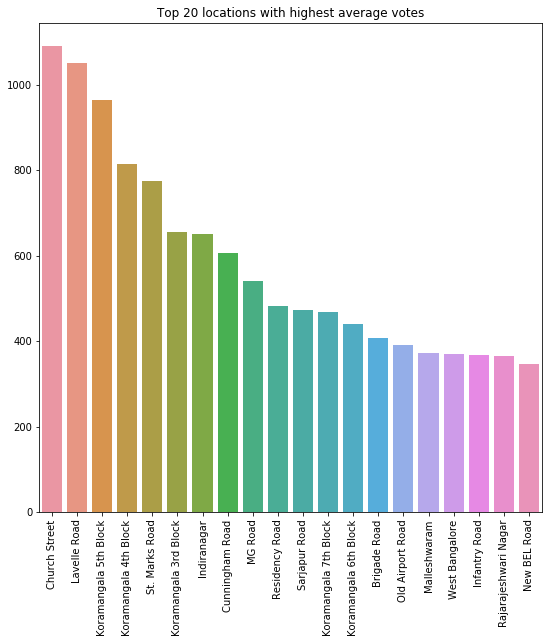

In [0]:
plt.figure(figsize=(9,9))
plot=sns.barplot(votes.index.to_list()[:20],votes['votes'].to_list()[:20])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.title("Top 20 locations with highest average votes")
plt.show()

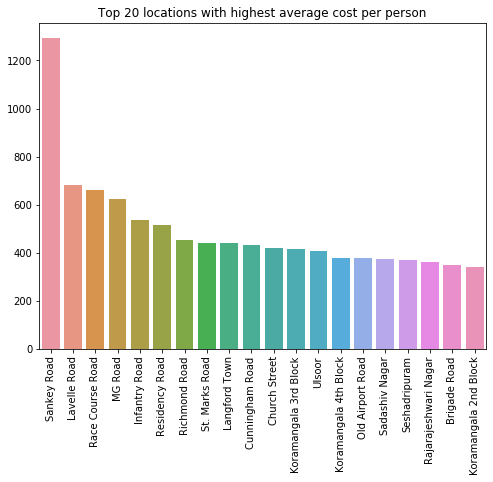

In [0]:
plt.figure(figsize=(8,6))
plot=sns.barplot(costs_desc.index.to_list()[:20],costs_desc['cost(per person)'].to_list()[:20])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.title("Top 20 locations with highest average cost per person")
plt.show()

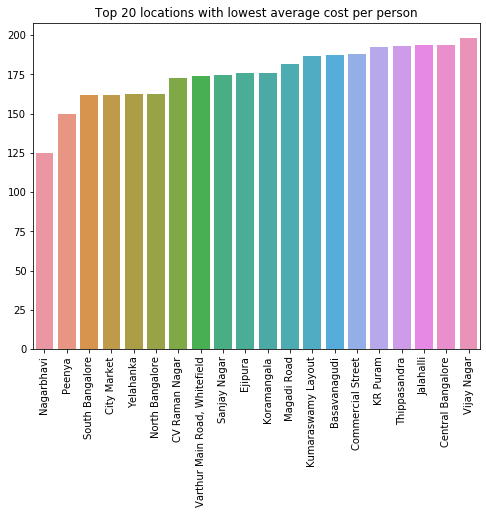

In [0]:
plt.figure(figsize=(8,6))
plot=sns.barplot(costs_asc.index.to_list()[:20],costs_asc['cost(per person)'].to_list()[:20])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.title("Top 20 locations with lowest average cost per person")
plt.show()

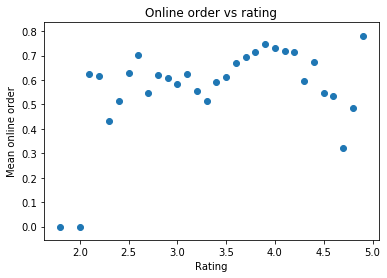

In [0]:
rating_wise_mean=df.groupby('rating').mean()
plt.scatter(rating_wise_mean.index.to_list(),rating_wise_mean['online_order'].to_list())
plt.xlabel('Rating')
plt.ylabel('Mean online order')
plt.title('Online order vs rating')
plt.show()

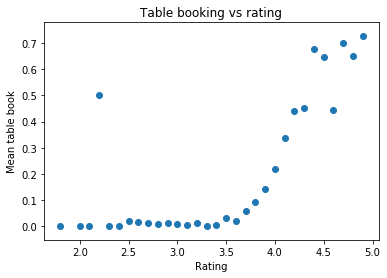

In [0]:
rating_wise_mean=df.groupby('rating').mean()
plt.scatter(rating_wise_mean.index.to_list(),rating_wise_mean['book_table'].to_list())
plt.xlabel('Rating')
plt.ylabel('Mean table book')
plt.title('Table booking vs rating')
plt.show()

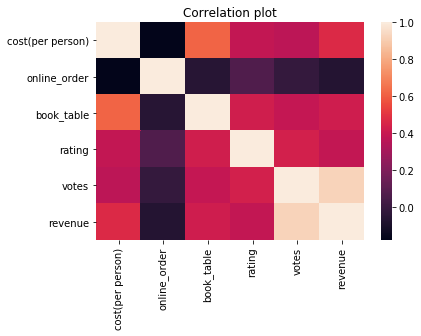

In [98]:
# plt.figure(figsize=(9,9))
ax=sns.heatmap(df.corr())
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation plot')
plt.show() 

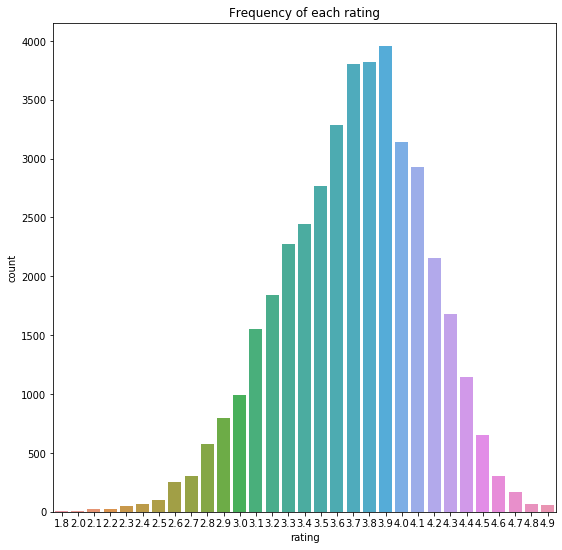

In [0]:
plt.figure(figsize=(9,9))
sns.countplot(x='rating',data=df)
plt.title('Frequency of each rating')
plt.show()
# Should be normally distributed as expected

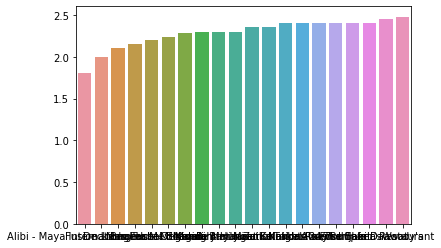

In [0]:
# rest_wise=df.groupby('name').mean()

# rating_desc= rest_wise.sort_values(by='rating', ascending=True)
# sns.barplot(rating_desc.index.to_list()[:20],rating_desc['rating'].to_list()[:20])


In [0]:
location_list=df['location'].unique()

location2idx={val:i for i,val in enumerate(location_list)}
idx2location={i:val for i,val in enumerate(location_list)}

In [0]:
cuisine_list=list(set(itertools.chain(*[i.split(', ') for i in df['cuisines'].unique()]))) 

cuisine2idx={val:i for i,val in enumerate(cuisine_list)}
idx2cuisine={i:val for i,val in enumerate(cuisine_list)}

In [0]:
counts=np.zeros((len(location_list),len(cuisine_list)))

for i in range(df.shape[0]):
    cur_location=location2idx[df.loc[i,['location']][0]]
    for val in df.loc[i,['cuisines']].str.split(', ')[0]:
        cur_cuisine=cuisine2idx[val]
        counts[cur_location,cur_cuisine]+=1
    
num_cuisine=counts.sum(axis=0)

In [0]:
plt.figure(figsize=(10,10))
sns.distplot((counts/counts.sum(axis=1).reshape(-1,1)).sum(axis=0))

In [0]:
plt.figure(figsize=(10,10))
sns.distplot(counts.sum(axis=0))

In [0]:
high_cols=np.where(counts.sum(axis=0)>10)
high_cols

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  20,  23,  24,  26,  27,  28,  29,  30,
         33,  35,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
         49,  50,  51,  52,  53,  54,  55,  57,  58,  59,  60,  61,  62,
         64,  65,  66,  67,  68,  69,  70,  71,  73,  74,  75,  77,  78,
         80,  82,  83,  84,  86,  87,  88,  89,  90,  92,  93,  94,  95,
         96,  97,  98,  99, 100, 101, 103, 104]),)

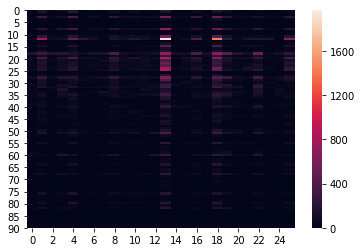

In [0]:
sns.heatmap(counts[:,high_cols].squeeze(1))

In [0]:
k=10
top_ind=np.argsort(-num_cuisine)[:k]
top_val=num_cuisine[top_ind]

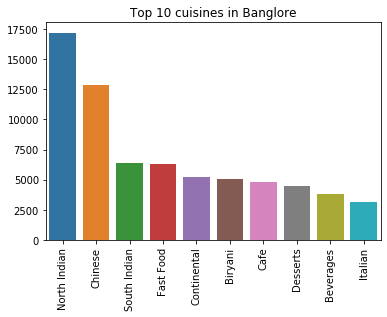

In [0]:
x_lab=[idx2cuisine[i] for i in top_ind]
ax=sns.barplot(x=x_lab,y=top_val)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Top 10 cuisines in Banglore')
plt.show()
# add map after this plot

# MAP

In [0]:
import folium
from folium.plugins import HeatMap

In [0]:
def generateBaseMap(default_location=[12.97, 77.59]):
    return folium.Map(location=default_location, control_scale=True, zoom_start=12)

In [36]:
df.head()

,name,address,location,rest_type,cuisines,cost(per person),online_order,book_table,rating,votes,revenue,reviews_list
0,Jalsa,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Banashankari,Buffet,"North Indian, Mughlai, Chinese",400,1,1,4.1,775,310000,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Banashankari,Buffet,"Chinese, North Indian, Thai",400,1,0,4.1,787,314800,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,San Churro Cafe,"1112, Next to KIMS Medical College, 17th Cross...",Banashankari,Buffet,"Cafe, Mexican, Italian",400,1,0,3.8,918,367200,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,Addhuri Udupi Bhojana,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Banashankari,Buffet,"South Indian, North Indian",150,0,0,3.7,88,13200,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,Grand Village,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Basavanagudi,Buffet,"North Indian, Rajasthani",300,0,0,3.8,166,49800,"[('Rated 4.0', 'RATED\n Very good restaurant ..."


In [0]:
def gen_map(coord_counts,radius=15):
    basemap=generateBaseMap()
    HeatMap(coord_counts,radius=radius).add_to(basemap)
    return basemap

In [0]:
address_counts=df['address'].value_counts()
address=address_counts.index.to_list()
address_counts=address_counts.to_list()

In [0]:
coord=pd.read_csv('/content/Coordinates_Data_f.csv')

coord_counts=[]
for i in range(len(coord['Location'])):
    ind=list(address).index(coord['Location'][i])
    coord_counts.append([coord['X'][i],coord['Y'][i],address_counts[ind]])

In [80]:
gen_map(coord_counts)

In [81]:
address_mean=df.groupby('address').mean()
address_mean

,cost(per person),online_order,book_table,rating,votes,revenue
address,,,,,,
"# 31, 7th Cross, Opposite Canara Bank, Domlur, Bangalore",300.0,1.0,0.0,4.100000,364.750000,109425.000000
"# 8 (169) 11th cross S.R Nagar Residency Road, Bangalore",200.0,1.0,0.0,3.000000,13.000000,2600.000000
"#,1070 Ground Floor, 24th Main, oppiste karnataka bank, 1st Sector, HSR Layout, HSR, Bangalore",150.0,0.0,0.0,4.000000,104.000000,15600.000000
"#01, 1st A Main BTM 2nd Stage, BTM, Bangalore",150.0,1.0,0.0,3.422222,6.777778,1016.666667
"#03, Sai Sanjeevani Layout, 1st Main Road, Munnekollall, Marathahalli, Bangalore",250.0,0.0,0.0,3.700000,41.000000,10250.000000
...,...,...,...,...,...,...
"Zone by The Park, 26/A, Phase 1, Electronic City, Bangalore",700.0,0.0,1.0,4.000000,415.000000,290500.000000
"bhaskar reddy building, hosur main road, yellamma temple road, Electronic City, Bangalore",150.0,1.0,0.0,3.300000,7.000000,1050.000000
"c/o Foodism, 2nd A Main Road, 445/31, 7th Cross Road, Vibhutipura Extension, Doddanekundi, Doddanekkundi, Bengaluru, Karnataka 560037",150.0,1.0,0.0,4.200000,44.000000,6600.000000


In [0]:
address=address_mean.index.to_list()
cost_list=address_mean['cost(per person)'].to_list()
rating_list=address_mean['rating'].to_list()

In [89]:
coord_counts=[]
for i in range(len(coord['Location'])):
    ind=list(address).index(coord['Location'][i])
    coord_counts.append([coord['X'][i],coord['Y'][i],cost_list[ind]])

gen_map(coord_counts,radius=10)

In [90]:
coord_counts=[]
for i in range(len(coord['Location'])):
    ind=list(address).index(coord['Location'][i])
    coord_counts.append([coord['X'][i],coord['Y'][i],rating_list[ind]])

gen_map(coord_counts,radius=10)

# User input

In [95]:
location=input('Enter location of your restaurant: ')
rest_type=input('Enter type of your restaurant: ')
online = input("Enter 1 - Accept online order OR 0 - Dont accept online order")
table = input("Enter 1 - Book tables OR 0 - Dont book tables")
rating = input("Enter your average rating")

KeyboardInterrupt: ignored

In [94]:
rest_type

'raghav dabha'

In [70]:
input()

asdasd


'asdasd'